$\Huge{\text{Linear Regression}}$

$\Large{\text{More examples}}$


In this session, we shall learn about some limitations of linear regression.

Let us first consider a sample data, which will be useful for our study.

In [ ]:
#First, we import the required packages
import pandas as pd #the pandas library is useful for data processing
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline

Now let us consider a data set originally due to Anscombe.
The data set contains a predictor and response variable.

In [ ]:
#Let us explore the data and the description

#Get the data from the web
anscombe_data_2 = pd.read_csv('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/data/anscombe_data_1.txt', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data
anscombe_data_2.head()


,0,1
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33


In [ ]:
#if you wish to print the entire data, then use the following
print(anscombe_data_2)

     0      1
0   10   8.04
1    8   6.95
2   13   7.58
3    9   8.81
4   11   8.33
5   14   9.96
6    6   7.24
7    4   4.26
8   12  10.84
9    7   4.82
10   5   5.68


What do the numbers in the above data mean? Let us understand the data by seeing its description.

In [ ]:
import urllib.request   #this package is useful for accessing text files over internet
anscombe_data_2_description_file = urllib.request.urlopen('https://raw.githubusercontent.com/balamurugan-palaniappan-CEP/AIML_CEP_2021/main/data/anscombe_data_4_description.txt')


for line in anscombe_data_2_description_file:
  decoded_line = line.decode("utf-8")
  print(decoded_line)

Contrived data set 4 constructed to showcase the limitations in linear regression. 



Source:

Anscombe, F. J. (1973). Graphs in statistical analysis. American Statistician, vol. 27, Pages 17–22.



Variables/Columns



The first column denotes the predictor variable X



The second column denotes the response variable Y





Having known the data description, let us insert the descriptions into the data now.

In [ ]:
anscombe_data_2.columns = ['X', 'Y']

#check by printing the data again
anscombe_data_2.head()

,X,Y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33


Seeing the data as mere numbers might not be interesting. So, let us use some graphical ways to visualize the data.

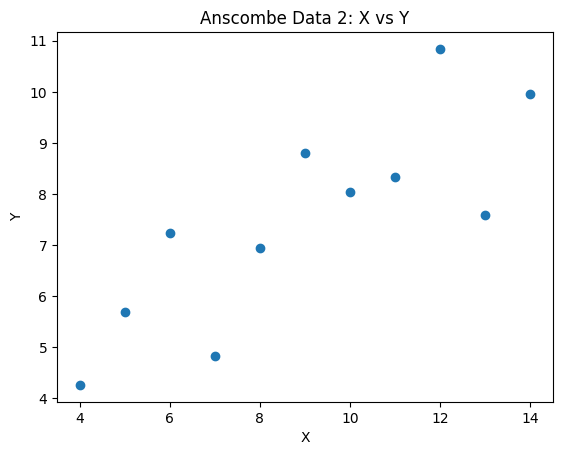

In [ ]:
#We will plot a scatter plot of X vs Y

plt.scatter(anscombe_data_2['X'], anscombe_data_2['Y'])
plt.title("Anscombe Data 2: X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

$\large{\text{Question:}}$ Is the trend linear (or) at least linear looking?

$\Large{\text{Computing } \beta_0, \beta_1 \text{ for the Anscombe data set 2}}:$

In [ ]:
#Let us now compute beta_0 and beta_1 from the anscombe data set 2
n = len(anscombe_data_2.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 11


In [ ]:
#First let us compute x_bar and y_bar
x_bar = 0
y_bar = 0

for i in range(n): #access each row from the data set
  x_bar += float(anscombe_data_2.iat[i,0]) #access element at X column
  y_bar += float(anscombe_data_2.iat[i,1]) #access element at Y column
x_bar /= n
y_bar /= n
print('x bar:',x_bar, 'y bar:',y_bar)

x bar: 9.0 y bar: 7.500909090909093


In [ ]:
#Then we will compute Sigma_XX and Sigma_XY
sigma_xx = 0
sigma_xy = 0

for i in range(n): #access each row from the data set
  sigma_xx += (float(anscombe_data_2.iat[i,0]) - x_bar)**2 #computing (x^i - x_bar)^2
  sigma_xy += (float(anscombe_data_2.iat[i,0]) - x_bar) * (float(anscombe_data_2.iat[i,1])-y_bar) #computing (x^i - x_bar)(y^i-y_bar)
print('sigma_xx:',sigma_xx, 'sigma_xy:',sigma_xy)

sigma_xx: 110.0 sigma_xy: 55.010000000000005


In [ ]:
#Now we can compute beta_0 and beta_1
beta_1 = sigma_xy/sigma_xx
beta_0 = y_bar - beta_1* x_bar

print('beta_0:', beta_0, 'beta_1', beta_1)


beta_0: 3.0000909090909103 beta_1 0.5000909090909091


$\Large{\text{Plotting the regression line}}$

Having computed $\beta_0$ and $\beta_1$, we will now plot the line $y=\beta_1 x + \beta_0$ along with the points in the data set.

In [ ]:
#compute the left and right limits of the x-axis
x_min = 9999
x_max = -9999

for i in range(n): #access each row from the data set
  x_i = float(anscombe_data_2.iat[i,0]) #access element at X column
  if x_i > x_max:
    x_max = x_i
  if x_i < x_min:
    x_min = x_i

x_min = x_min - 1
x_max = x_max + 1

print('x_min:',x_min,'x_max:',x_max)




x_min: 3.0 x_max: 15.0


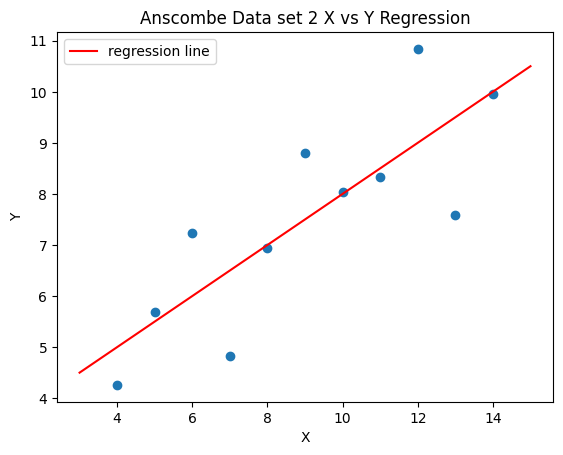

In [ ]:
import numpy as np
x = np.linspace(x_min,x_max,100) #creates a series of points in x axis
y = beta_1*x+beta_0
plt.plot(x, y, '-r', label='regression line')
plt.scatter(anscombe_data_2['X'], anscombe_data_2['Y'])

plt.title("Anscombe Data set 2 X vs Y Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper left')
#plt.grid()
plt.show()

$\Large{\text{Residual vs Fit Plot}}$

Sometimes it would be useful to plot the error (or) $\textbf{residual}$ $e^i$ versus the fitted values $\hat{y}^i=\beta_1 x^i + \beta_0$.  

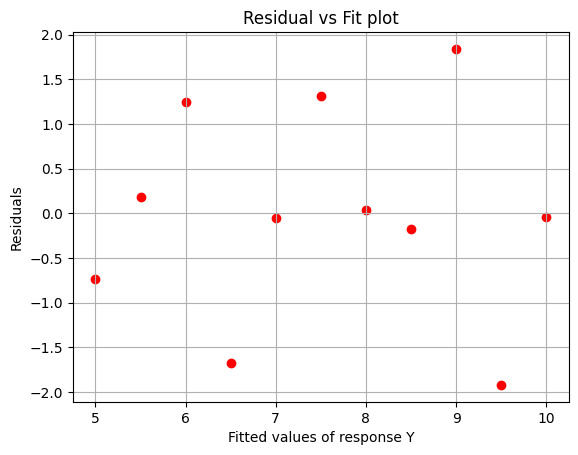

In [ ]:
e_i_residuals_list = []
y_pred_list = []

for i in range(n): #access each row from the data set
  x_i = float(anscombe_data_2.iat[i,0]) #access element at X column
  y_i = float(anscombe_data_2.iat[i,1]) #access element at Y column

  y_pred_i = beta_1 * x_i + beta_0 #compute the prediction obtained using the regression coefficients
  e_i = y_i - y_pred_i #compute the difference between the actual observation y_i and prediction y_pred_i

  e_i_residuals_list.append(e_i) #append the value of e_i to the list
  y_pred_list.append(y_pred_i)
#plot the residuals e_i against the fitted values of Y
plt.scatter(y_pred_list, e_i_residuals_list,color='r')
plt.title("Residual vs Fit plot")
plt.xlabel("Fitted values of response Y")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note a systematic trend in residual behavior as $\hat{y}$ varies. This would mean that the residuals do not behave randomly.

#Residue vs Predictor Plot

Let us plot the residue vs predictor.

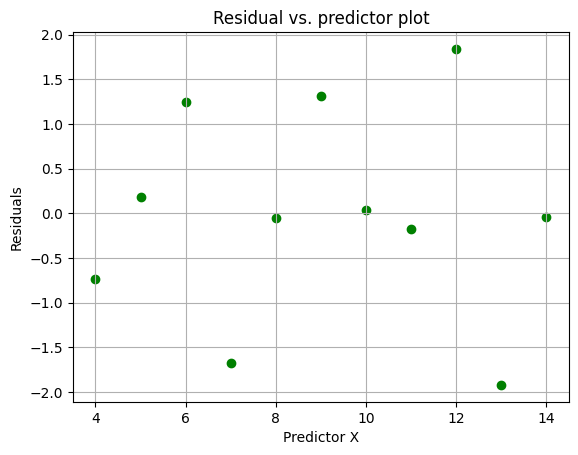

In [ ]:
#plot the residuals e_i against the predictors x_i
plt.scatter(anscombe_data_2['X'], e_i_residuals_list,color='g')
plt.title("Residual vs. predictor plot")
plt.xlabel("Predictor X")
plt.ylabel("Residuals")
plt.grid()
plt.show()

Note a systematic trend in residual behavior as $x$ varies. This would mean that the residuals do not behave randomly.

Note that the residual plot helps to check the variance in the errors $e^i$.

Let us now compute the sample correlation.

In [ ]:
#Note that sigma_XY and sigma_XX have already been computed.
#Hence we will now compute sigma_YY

#Also note that y_bar is computed before

sigma_yy = 0
for i in range(n): #access each row from the data set
  y_i = float(anscombe_data_2.iat[i,1]) #access element at Y column
  sigma_yy += (y_i-y_bar)**2

print('sigma_yy:', sigma_yy)

#Then we will compute the sample correlation
sample_correlation = sigma_xy/(np.sqrt(sigma_xx * sigma_yy))
print('sample correlation:',sample_correlation)

sigma_yy: 41.27269090909091
sample correlation: 0.81642051634484


Let us compute $R^2$.

In [ ]:
#Note that sum of squared residuals needs to be computed

sum_sq_residuals = 0
for i in range(n): #access each row from the data set
  x_i = float(anscombe_data_2.iat[i,0]) #access element at X column
  y_i = float(anscombe_data_2.iat[i,1]) #access element at Y column
  y_pred_i = beta_1*x_i + beta_0
  sum_sq_residuals += (y_i-y_pred_i)**2

print('sum of squared residuals:', sum_sq_residuals)

#Then we will compute the R^2 quantity
R_sq = 1-sum_sq_residuals/sigma_yy
print('R^2:',R_sq)

sum of squared residuals: 13.76269
R^2: 0.666542459508775


Note that $R^2$ value is not too high, which also indicates that the fit is not impressive.

$\Large{\text{Exercises:}}$


1.   Try to use data sets from $\text{anscombe}\_\text{data}\_\text{3.txt}$ and $\text{anscombe}\_\text{data}\_\text{4.txt}$ and find the linear regression model for these data sets. Summarize your findings.  

2.   Consider the data from http://users.stat.ufl.edu/~winner/data/brainhead.dat and the corresponding data description from http://users.stat.ufl.edu/~winner/data/brainhead.txt. Choose the predictor variable to be $\textit{head size}$ and the $\textit{brain weight}$ to be response variable. Use linear regression to model the relationship between head size and brain weight. Explain your findings.

